In [10]:
%matplotlib inline

In [11]:
import numpy as np
import scipy.sparse as sp
from pyamg.gallery import poisson, diffusion_stencil_2d, stencil_grid
from pyamg.relaxation.relaxation import gauss_seidel
save = 1

In [12]:
grid = (10,10)
#A = poisson(grid)
sten = diffusion_stencil_2d(epsilon=0.001, theta=3.0*np.pi/4, type='FE')
A = stencil_grid(sten, grid)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation

def update_plot(frame_num, surf, x_true, b, x):
    if frame_num > 0:
        gauss_seidel(A, x, b)
    error = np.abs(x_true - x)
    print(np.linalg.norm(error))
    E = np.reshape(error, grid)
      
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, E, cmap=cm.coolwarm)
    ax.set_zlim(0, 0.8)
        
    return surf

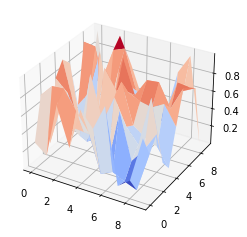

In [14]:
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(projection='3d')
    
X = np.arange(0, grid[0])
Y = np.arange(0, grid[1])
X, Y = np.meshgrid(X, Y)

x_true = np.ones(A.shape[0],)
b = A.dot(x_true)
x = np.random.rand(A.shape[0],)
error = np.abs(x_true - x)
E = np.reshape(error, grid) 
surf = [ax.plot_surface(X, Y, E, cmap=cm.coolwarm)]

anim = FuncAnimation(fig, update_plot, 15, fargs=(surf, x_true, b, x), interval=1000)

In [15]:
if save:
    anim.save('gauss_seidel_diffuse.mp4', writer='ffmpeg', fps=1, dpi=100)

6.071236953915548
6.071236953915548
4.519132633449894
3.8693502669042523
3.440617232800282
3.0993615528653327
2.811818943360054
2.562450770475117
2.3422890419226614
2.1454112826135745
1.9677584329983495
1.806477798760474
1.6594748928076524
1.5251257345055629
1.402112811194765
1.2893310710914658


In [9]:
HTML(anim.to_html5_video())

6.1455696904919215
6.1455696904919215
4.761302674885338
4.196401387939026
3.7879899911918375
3.45624301688042
3.1715426745731885
2.919250065609973
2.691442231129982
2.483568312516894
2.2927239607072907
2.1169013483038484
1.9545944653405138
1.8045969555326862
1.6658951129912238
1.537606708372687
